### HAPINESS DATASET

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns#visualization
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "C:\\Users\\foreb\\4 SEMESTER\\CAPSTONE 2\\happiness_clean.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1513 non-null   object 
 1   Happiness Score               1513 non-null   float64
 2   GDP per capita                1513 non-null   float64
 3   Social support                1513 non-null   float64
 4   Healthy life expectancy       1513 non-null   float64
 5   Freedom to make life choices  1513 non-null   float64
 6   Generosity                    1513 non-null   float64
 7   Perceptions of corruption     1513 non-null   float64
 8   Year                          1513 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 106.5+ KB
None
       Country  Happiness Score  GDP per capita  Social support  \
0  Switzerland            7.587         1.39651         1.34951   
1      Iceland            7.561         1.

In [4]:
# Select features (X) and target (y)
X = df[[ "Social support","Freedom to make life choices","Perceptions of corruption", "GDP per capita",
        "Healthy life expectancy","Generosity","Year"]]
y = df["Happiness Score"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (1210, 7), Testing Data: (303, 7)


**Comparison between linear Regresion, Random Forest and XGboost Models** **bold text**

In [5]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
}

# Initialize a dictionary to store results
results = {}

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    r2 = r2_score(y_test, y_pred)

    # Calculate accuracy based on RMSE
    happiness_range = y_test.max() - y_test.min()
    accuracy = (1 - (rmse / happiness_range)) * 100

    # Store results
    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Accuracy (%)': accuracy
    }

# Print results
for name, metrics in results.items():
    print(f"{name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")
    print()  # Add an empty line for better readability

Linear Regression Performance:
MAE: 0.54
RMSE: 0.75
R²: 0.34
Accuracy (%): 84.95

Random Forest Performance:
MAE: 0.37
RMSE: 0.62
R²: 0.55
Accuracy (%): 87.51

XGBoost Performance:
MAE: 0.37
RMSE: 0.61
R²: 0.56
Accuracy (%): 87.65



Comparing the performance with the model with all variables the accuracy with all is 87% agains 86.60, with the selected independient variables

**Optimize XGBoost with Optuna**

In [6]:
  pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install optuna xgboost scikit-learn pandas numpy

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the Optuna objective function
def objective(trial):
    # Suggest values for hyperparameters
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 9),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
    }

    # Train XGBoost model
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    # Predict and evaluate using RMSE
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return rmse  # Optuna will minimize this

# Run the Optuna study for 30 trials
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Get the best parameters
best_params_optuna = study.best_params
print("\nBest Hyperparameters:", best_params_optuna)

# Train the final model with optimized parameters
optimized_model = XGBRegressor(**best_params_optuna, random_state=42)
optimized_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_optimized = optimized_model.predict(X_test)

# Evaluate the optimized model
rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Calculate accuracy based on RMSE and the range of target values
happiness_range = y_test.max() - y_test.min()
accuracy_optimized = (1 - (rmse_optimized / happiness_range)) * 100

# Print results
print("\nModel Performance after Hyperparameter Tuning:")
print(f"RMSE: {rmse_optimized:.4f}")
print(f"MAE: {mae_optimized:.4f}")
print(f"R² Score: {r2_optimized:.4f}")
print(f"Estimated Accuracy: {accuracy_optimized:.2f}%")

[I 2025-04-11 12:58:42,762] A new study created in memory with name: no-name-4f6c03fb-d8d1-43be-a6c8-30d751c11d02
[I 2025-04-11 12:58:43,233] Trial 0 finished with value: 0.6095273234836824 and parameters: {'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.035294851372104814, 'subsample': 0.7903233975765525, 'colsample_bytree': 0.9498381803359504}. Best is trial 0 with value: 0.6095273234836824.
[I 2025-04-11 12:58:43,438] Trial 1 finished with value: 0.6069089196525634 and parameters: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.018820923910110643, 'subsample': 0.6292757785431681, 'colsample_bytree': 0.7174670775513443}. Best is trial 1 with value: 0.6069089196525634.
[I 2025-04-11 12:58:43,582] Trial 2 finished with value: 0.6255085247795282 and parameters: {'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.021066998879646984, 'subsample': 0.7303291871027824, 'colsample_bytree': 0.9350727498313673}. Best is trial 1 with value: 0.6069089196525634.
[I 2025-04-11

[I 2025-04-11 12:58:51,596] Trial 28 finished with value: 0.6067763570163308 and parameters: {'n_estimators': 250, 'max_depth': 6, 'learning_rate': 0.09160694697239656, 'subsample': 0.7631929940314622, 'colsample_bytree': 0.8750994609926882}. Best is trial 22 with value: 0.6018831112153938.
[I 2025-04-11 12:58:51,898] Trial 29 finished with value: 0.6059146600077271 and parameters: {'n_estimators': 250, 'max_depth': 6, 'learning_rate': 0.036260106195977075, 'subsample': 0.8220544874054753, 'colsample_bytree': 0.8243241371114712}. Best is trial 22 with value: 0.6018831112153938.



Best Hyperparameters: {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.02577473788188385, 'subsample': 0.6987560294022968, 'colsample_bytree': 0.8971337148435709}

Model Performance after Hyperparameter Tuning:
RMSE: 0.6019
MAE: 0.3611
R² Score: 0.5743
Estimated Accuracy: 87.88%


**Explanation of the Code**

* Uses Optuna to search for the best hyperparameters via Bayesian Optimization.
* Trains XGBoost with the best-found parameters and evaluates performance
using RMSE, MAE, and R² Score.



**Visualize Feature Importance**

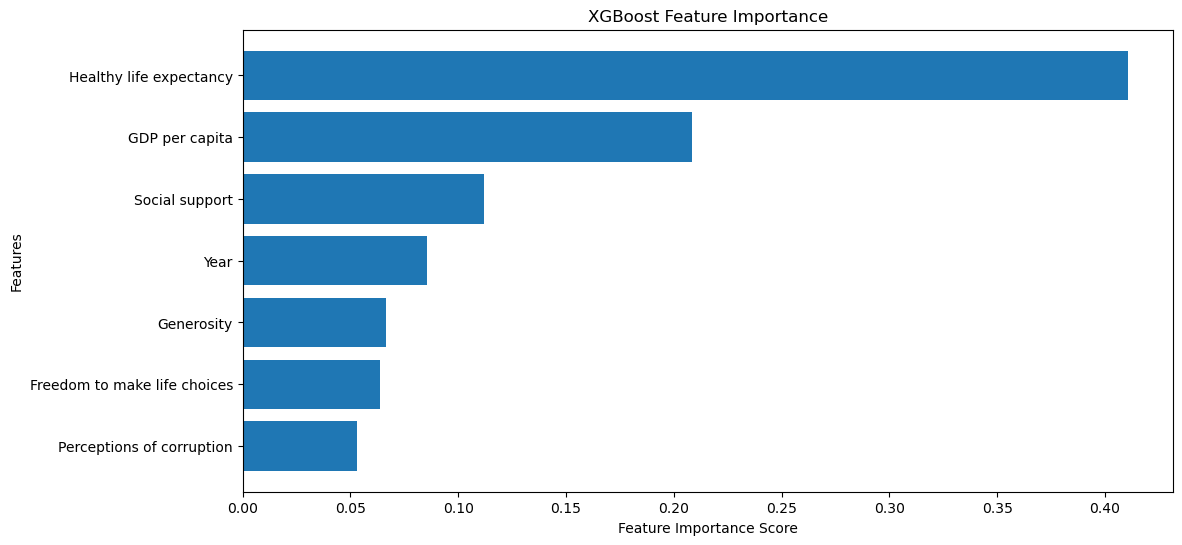

In [8]:
import matplotlib.pyplot as plt

# Get feature importance from the trained XGBoost model
importance = optimized_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to sort features by importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)  # Sort from most to least important

# Plot sorted feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### COMPARING ADITIONAL MODEL


Model Comparison Results:
                          RMSE       MAE  R² Score  Accuracy (%)
XGBoost               0.605642  0.365768  0.568979     87.809137
Random Forest         0.619620  0.374830  0.548854     87.527781
Linear Regression     0.747498  0.542568  0.343421     84.953738
Neural Network (MLP)  1.176392  0.965960 -0.626187     76.320615


,RMSE,MAE,R² Score,Accuracy (%)
XGBoost,0.605642,0.365768,0.568979,87.809137
Random Forest,0.619620,0.374830,0.548854,87.527781
Linear Regression,0.747498,0.542568,0.343421,84.953738
Neural Network (MLP),1.176392,0.965960,-0.626187,76.320615


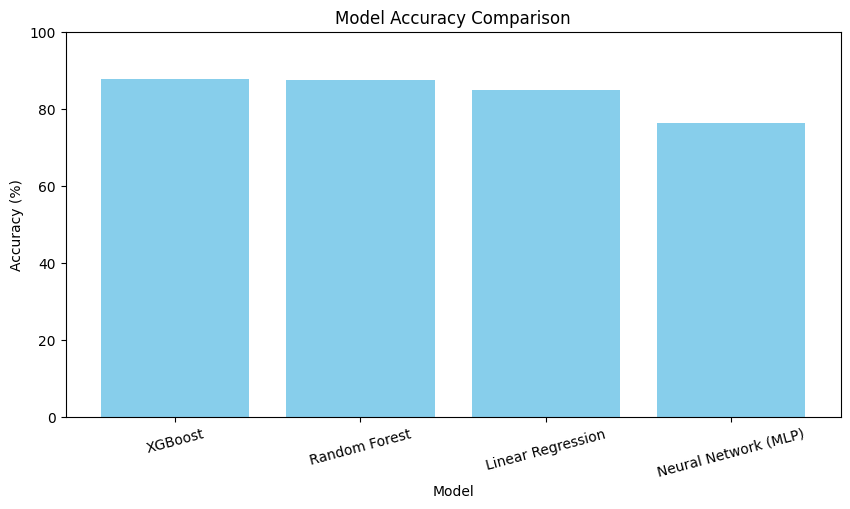

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models
models = {
    "XGBoost": optimized_model,  # Assuming optimized_model is defined previously
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Linear Regression": LinearRegression(),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42),
}

# Dictionary to store results
model_results = {}

# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data

    # Compute evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate accuracy based on RMSE and the range of target values
    happiness_range = y_test.max() - y_test.min()
    accuracy = (1 - (rmse / happiness_range)) * 100  # Correct accuracy calculation

    # Store results
    model_results[name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R² Score": r2,
        "Accuracy (%)": accuracy,  # Correct accuracy calculation
    }

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T

# Display the results
print("\nModel Comparison Results:")
print(results_df)  # Display in console

from IPython.display import display
display(results_df)  # Displays as a nice table

# Plot Accuracy Comparison
plt.figure(figsize=(10, 5))
plt.bar(results_df.index, results_df["Accuracy (%)"], color='skyblue')
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=15)
plt.ylim(0, 100)  # Set limit to 100% for better visualization
plt.show()

**Analyze the Best Model**

In [ ]:
# Identify the best model based on lowest RMSE
best_model_name = results_df["RMSE"].idxmin()
best_model_rmse = results_df.loc[best_model_name, "RMSE"]
best_model_r2 = results_df.loc[best_model_name, "R² Score"]

print(f"\nBest Model: {best_model_name}")
print(f"Lowest RMSE: {best_model_rmse:.4f}")
print(f"Highest R² Score: {best_model_r2:.4f}")

# Retrieve the best model instance
best_model = models[best_model_name]



Best Model: XGBoost
Lowest RMSE: 0.6056
Highest R² Score: 0.5690


**Hyperparameter Tuning Code (Using Optuna)**

In [ ]:
# BEST MODEL XGBOOST OPTIMIZED WITH OPTUNA
# BEST MODEL XGBOOST OPTIMIZED WITH OPTUNA
# BEST MODEL XGBOOST OPTIMIZED WITH OPTUNA

import numpy as np
import optuna
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# List to store model results
model_results = []

def objective(trial):
    if best_model_name == "XGBoost":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 500, step=50),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        }
        model = XGBRegressor(**params, random_state=42)

    elif best_model_name == "Random Forest":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 500, step=50),
            "max_depth": trial.suggest_int("max_depth", 3, 20),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        }
        model = RandomForestRegressor(**params, random_state=42)

    elif best_model_name == "Neural Network (MLP)":
        params = {
            "hidden_layer_sizes": (trial.suggest_int("layer1", 32, 128), trial.suggest_int("layer2", 16, 64)),
            "alpha": trial.suggest_float("alpha", 1e-5, 1e-1, log=True),
            "learning_rate_init": trial.suggest_float("learning_rate_init", 0.001, 0.1, log=True),
            "max_iter": 500,
        }
        model = MLPRegressor(**params, random_state=42)

    else:
        return float("inf")  # Return high error if no valid model

    # Train & evaluate the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Save model results
    model_results.append({
        "model": model,
        "rmse": rmse,
        "params": params
    })

    return rmse  # Optuna minimizes RMSE

# Run the Optuna study
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Get best parameters
best_hyperparams = study.best_params
print("\nBest Hyperparameters Found:", best_hyperparams)

# Train the best model with tuned hyperparameters
if best_model_name == "XGBoost":
    best_model = XGBRegressor(**best_hyperparams, random_state=42)
elif best_model_name == "Random Forest":
    best_model = RandomForestRegressor(**best_hyperparams, random_state=42)
elif best_model_name == "Neural Network (MLP)":
    best_model = MLPRegressor(**best_hyperparams, random_state=42)

# Train final best model
best_model.fit(X_train, y_train)
y_pred_final = best_model.predict(X_test)

# Evaluate final best model
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
final_mae = mean_absolute_error(y_test, y_pred_final)
final_r2 = r2_score(y_test, y_pred_final)

# Calculate accuracy based on RMSE and the range of target values
happiness_range = y_test.max() - y_test.min()
final_accuracy = (1 - (final_rmse / happiness_range)) * 100  # Correct accuracy calculation

# Print results
print("\nFinal Optimized Model Performance:")
print(f"RMSE: {final_rmse:.4f}")
print(f"MAE: {final_mae:.4f}")
print(f"R² Score: {final_r2:.4f}")
print(f"Estimated Accuracy: {final_accuracy:.2f}%")

# Identify the best model
best_model_info = min(model_results, key=lambda x: x['rmse'])
print("\nBest Model Found:")
print(f"Model: {best_model_name} with RMSE: {best_model_info['rmse']:.4f}")
print("Parameters:", best_model_info['params'])

[I 2025-03-11 21:56:36,135] A new study created in memory with name: no-name-13247e89-b3b3-4e16-a54e-1847dd95ec3c
[I 2025-03-11 21:56:46,855] Trial 0 finished with value: 0.6098229050038965 and parameters: {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.02378101938625526, 'subsample': 0.6938232457195561, 'colsample_bytree': 0.7268068068004956}. Best is trial 0 with value: 0.6098229050038965.
[I 2025-03-11 21:56:47,862] Trial 1 finished with value: 0.6149165868444932 and parameters: {'n_estimators': 250, 'max_depth': 6, 'learning_rate': 0.08127002891022776, 'subsample': 0.7379134899931129, 'colsample_bytree': 0.6542489539398789}. Best is trial 0 with value: 0.6098229050038965.
[I 2025-03-11 21:56:48,021] Trial 2 finished with value: 0.6194724464646241 and parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05050024064671189, 'subsample': 0.9710732812079206, 'colsample_bytree': 0.6077887680686133}. Best is trial 0 with value: 0.6098229050038965.
[I 2025-03-11 2


Best Hyperparameters Found: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.03994110961217926, 'subsample': 0.8879046515953931, 'colsample_bytree': 0.7644263638483743}

Final Optimized Model Performance:
RMSE: 0.6067
MAE: 0.3670
R² Score: 0.5675
Estimated Accuracy: 87.79%

Best Model Found:
Model: XGBoost with RMSE: 0.6067
Parameters: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.03994110961217926, 'subsample': 0.8879046515953931, 'colsample_bytree': 0.7644263638483743}


### SAVING THE BEST MODEL (XG BOOST)

In [ ]:
import joblib
from xgboost import XGBRegressor

# Assuming you have already optimized and trained the XGBoost model
best_hyperparams = {  # Insert the best hyperparameters found
    "n_estimators": 300,  # Example
    "max_depth": 7,
    "learning_rate": 0.03994110961217926,
    "subsample": 0.8879046515953931,
    "colsample_bytree": 0.7644263638483743,
}
best_model_XGB = XGBRegressor(**best_hyperparams, random_state=42)
best_model_XGB.fit(X_train, y_train)  # Train the model with your data

# Save the model to a file
joblib.dump(best_model_XGB, 'xgboost_model.pkl')

print("XGBoost model saved as 'xgboost_model.pkl'")

XGBoost model saved as 'xgboost_model.pkl'


**Deploy the Best Model (Flask API)**

In [ ]:
pip install flask

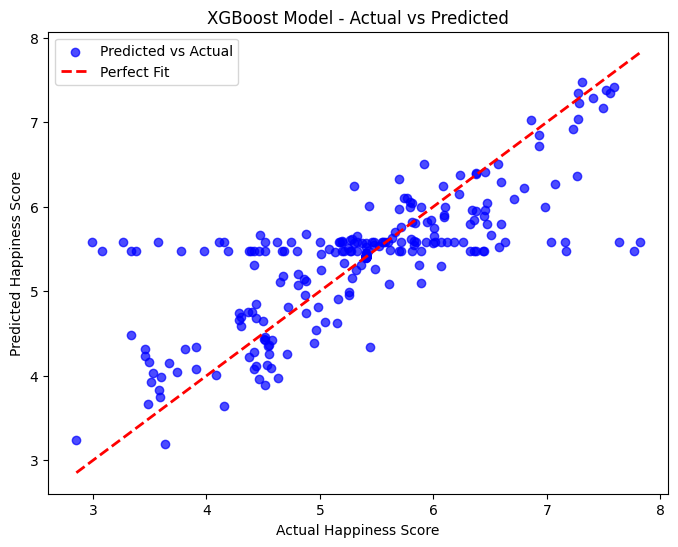

In [ ]:
import matplotlib.pyplot as plt

# Create a figure for the plot
plt.figure(figsize=(8, 6))

# Scatter plot between actual values and final predictions
plt.scatter(y_test, y_pred_final, alpha=0.7, color='blue', label="Predicted vs Actual")

# Perfect fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Happiness Score")
plt.ylabel("Predicted Happiness Score")
plt.title(f"{best_model_name} Model - Actual vs Predicted")

# Show legend
plt.legend()

# Show the plot
plt.show()

**Residual Analysis (Error Distribution)**

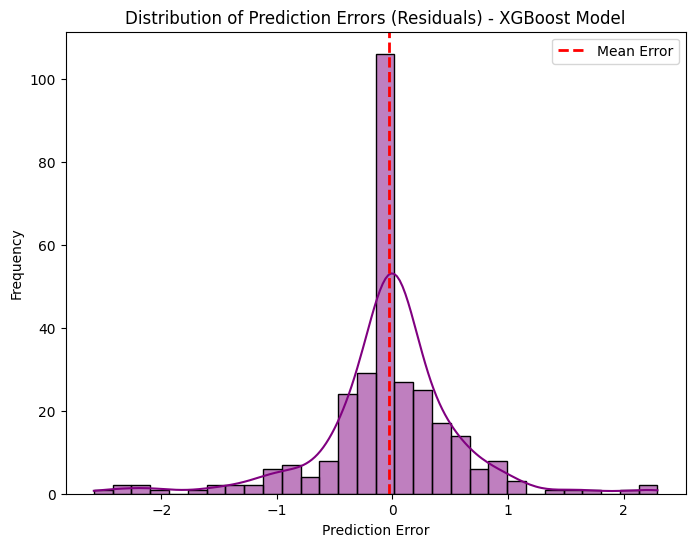

In [ ]:
import seaborn as sns

# Calculate the prediction errors
errors = y_test - y_pred_final

# Create a figure for the plot
plt.figure(figsize=(8, 6))

# Histogram of the errors
sns.histplot(errors, bins=30, kde=True, color="purple")

# Line representing the mean error
plt.axvline(errors.mean(), color='red', linestyle='dashed', linewidth=2, label="Mean Error")

# Labels and title
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title(f"Distribution of Prediction Errors (Residuals) - {best_model_name} Model")
plt.legend()

# Show the plot
plt.show()


# Remote job and Mental Health Dataset

In [ ]:
# Load dataset
file_path = "/content/Remote_Job_clean.csv"
remote_job = pd.read_csv(file_path)

# Display basic information
print(remote_job.info())
print(remote_job.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

Model: Random Forest
Accuracy: 0.3187

              precision    recall  f1-score   support

     Neutral       0.31      0.29      0.30       502
   Satisfied       0.31      0.31      0.31       503
 Unsatisfied       0.34      0.36      0.35       495

    accuracy                           0.32      1500
   macro avg       0.32      0.32      0.32      1500
weighted avg       0.32      0.32      0.32      1500

Model: Support Vector Machine
Accuracy: 0.3287

              precision    recall  f1-score   support

     Neutral       0.28      0.01      0.03       502
   Satisfied       0.33      0.47      0.39       503
 Unsatisfied       0.33      0.50      0.39       495

    accuracy                           0.33      1500
   macro avg       0.31      0.33      0.27      1500
weighted avg       0.31      0.33      0.27      1500

Model: Logistic Regression
Accuracy: 0.3287

              precision    recall  f1-score   support

     Neutral       0.32      0.27      0.29       5

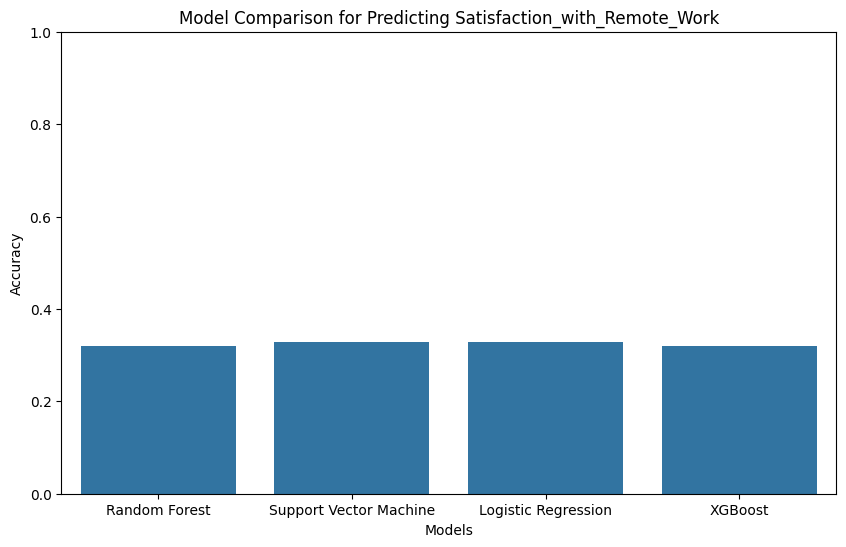

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# 1. Drop the Employee_ID column
remote_job_filtered = remote_job.drop(columns=['Employee_ID'])

# 2. Separate features (X) and target variable (y)
y = remote_job_filtered['Satisfaction_with_Remote_Work']
X = remote_job_filtered.drop('Satisfaction_with_Remote_Work', axis=1)

# 3. Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# 4. Handle null values
if X.isnull().any().any():
    X = X.dropna()

# 5. Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# 6. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 8. Train models and evaluate
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"Model: {model_name}\nAccuracy: {accuracy:.4f}\n")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# 9. Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Comparison for Predicting Satisfaction_with_Remote_Work')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

**Hyperparameter tuning**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Drop the Employee_ID column if it exists
remote_job_filtered = remote_job.drop(columns=['Employee_ID'], errors='ignore')

# 2. Separate features (X) and target variable (y)
y = remote_job_filtered['Satisfaction_with_Remote_Work']
X = remote_job_filtered.drop('Satisfaction_with_Remote_Work', axis=1)

# 3. Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# 4. Handle null values
if X.isnull().any().any():
    X = X.dropna()

# 5. Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# 6. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 8. Define the hyperparameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

# 9. Train models with hyperparameter tuning
results = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"Model: {model_name}\nBest Parameters: {grid_search.best_params_}\nAccuracy: {accuracy:.4f}\n")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.3193

              precision    recall  f1-score   support

     Neutral       0.30      0.30      0.30       502
   Satisfied       0.31      0.30      0.30       503
 Unsatisfied       0.35      0.36      0.35       495

    accuracy                           0.32      1500
   macro avg       0.32      0.32      0.32      1500
weighted avg       0.32      0.32      0.32      1500

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: Support Vector Machine
Best Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.3287

              precision    recall  f1-score   support

     Neutral       0.28      0.01      0.03       502
   Satisfied       0.33      0.47      0.39       503
 Unsatisfied       0.33      0.50      0.39       495

    accuracy                           0.33      1500
   macro avg   

**OPTIMIZING WITH OPTUNA**

In [ ]:
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Drop the Employee_ID column if it exists
remote_job_filtered = remote_job.drop(columns=['Employee_ID'], errors='ignore')

# 2. Separate features (X) and target variable (y)
y = remote_job_filtered['Satisfaction_with_Remote_Work']
X = remote_job_filtered.drop('Satisfaction_with_Remote_Work', axis=1)

# 3. Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# 4. Handle null values
if X.isnull().any().any():
    X = X.dropna()

# 5. Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# 6. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Define the objective function for Optuna
def objective(trial):
    model_name = trial.suggest_categorical('model', ['Random Forest', 'SVM', 'Logistic Regression', 'XGBoost'])

    if model_name == 'Random Forest':
        n_estimators = trial.suggest_int('n_estimators', 50, 200)
        max_depth = trial.suggest_int('max_depth', 1, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)

    elif model_name == 'SVM':
        C = trial.suggest_loguniform('C', 1e-3, 1e3)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])

        model = SVC(C=C, kernel=kernel, random_state=42)

    elif model_name == 'Logistic Regression':
        C = trial.suggest_loguniform('C', 1e-3, 1e3)
        penalty = trial.suggest_categorical('penalty', ['l2'])

        model = LogisticRegression(C=C, penalty=penalty, solver='liblinear', max_iter=1000)

    elif model_name == 'XGBoost':
        n_estimators = trial.suggest_int('n_estimators', 50, 100)
        max_depth = trial.suggest_int('max_depth', 3, 7)
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)

        model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, use_label_encoder=False, eval_metric='logloss')

    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# 8. Run the Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# 9. Output the best hyperparameters
print("Best hyperparameters:", study.best_params)

# 10. Train the best model
best_model_name = study.best_params['model']
best_model_params = {k: v for k, v in study.best_params.items() if k != 'model'}

if best_model_name == 'Random Forest':
    best_model = RandomForestClassifier(**best_model_params, random_state=42)
elif best_model_name == 'SVM':
    best_model = SVC(**best_model_params, random_state=42)
elif best_model_name == 'Logistic Regression':
    best_model = LogisticRegression(**best_model_params, max_iter=1000)
elif best_model_name == 'XGBoost':
    best_model = XGBClassifier(**best_model_params, use_label_encoder=False, eval_metric='logloss')

# Fit the best model and evaluate
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Model: {best_model_name}\nAccuracy: {accuracy:.4f}\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

[I 2025-03-12 16:27:07,652] A new study created in memory with name: no-name-34767ec4-a3f8-4eb5-beea-6027493c4f74
[I 2025-03-12 16:27:08,408] Trial 0 finished with value: 0.3253333333333333 and parameters: {'model': 'Random Forest', 'n_estimators': 136, 'max_depth': 12, 'min_samples_split': 9}. Best is trial 0 with value: 0.3253333333333333.
[I 2025-03-12 16:27:21,122] Trial 1 finished with value: 0.3313333333333333 and parameters: {'model': 'SVM', 'C': 2.4163120639993285, 'kernel': 'linear'}. Best is trial 1 with value: 0.3313333333333333.
[I 2025-03-12 16:27:23,573] Trial 2 finished with value: 0.32666666666666666 and parameters: {'model': 'SVM', 'C': 0.19244814885799164, 'kernel': 'linear'}. Best is trial 1 with value: 0.3313333333333333.
[I 2025-03-12 16:27:23,653] Trial 3 finished with value: 0.3293333333333333 and parameters: {'model': 'Logistic Regression', 'C': 0.6927048953633251, 'penalty': 'l2'}. Best is trial 1 with value: 0.3313333333333333.
[I 2025-03-12 16:27:23,946] Tria

Best hyperparameters: {'model': 'XGBoost', 'n_estimators': 60, 'max_depth': 3, 'learning_rate': 0.07012617331042247}
Best Model: XGBoost
Accuracy: 0.3553

              precision    recall  f1-score   support

     Neutral       0.35      0.29      0.31       502
   Satisfied       0.38      0.39      0.38       503
 Unsatisfied       0.34      0.39      0.37       495

    accuracy                           0.36      1500
   macro avg       0.35      0.36      0.35      1500
weighted avg       0.36      0.36      0.35      1500



**Mental tech dataset**

In [ ]:
# Load dataset
file_path = "/content/Mental_tech_clean.csv"
df1 = pd.read_csv(file_path)

# Display basic information
print(df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      1259 non-null   object
 5   self_employed              1259 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             1259 non-null   object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

**Comparing Gradient Boosting, Random Forest, Logistic Regression, Neural Network (MLP), Decision Tree and Support Vector Machine (SVM)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Drop irrelevant columns
df_cleaned = df1.drop(columns=['Timestamp', 'comments', 'state'])

# Encode categorical variables
label_encoders = {}
for col in df_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Define features (X) and target variable (y)
X1 = df_cleaned.drop(columns=['treatment'])
y1 = df_cleaned['treatment']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
}

# Initialize a list to store results
results = []

# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append([model_name, accuracy, precision, recall, f1])

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Sort results by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Print model performance
print("\nModel Performance Results (sorted by Accuracy):")
print(results_df.reset_index(drop=True))


Model Performance Results (sorted by Accuracy):
                    Model  Accuracy  Precision    Recall  F1-score
0       Gradient Boosting  0.730159   0.733506  0.730159  0.729563
1           Random Forest  0.718254   0.719691  0.718254  0.718054
2     Logistic Regression  0.698413   0.701421  0.698413  0.697747
3    Neural Network (MLP)  0.694444   0.695095  0.694444  0.693880
4           Decision Tree  0.654762   0.655223  0.654762  0.654735
5  Support Vector Machine  0.539683   0.547786  0.539683  0.507837


**Hyperparameter Tuning Code for Gradient Boosting**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grids for each model
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

param_grid_tree = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

param_grid_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

param_grid_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_svc = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (50, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500, 1000]
}

# Initialize models
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000, random_state=42), param_grid_logistic),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), param_grid_tree),
    "Random Forest": (RandomForestClassifier(random_state=42), param_grid_forest),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), param_grid_gbm),
    "Support Vector Machine": (SVC(probability=True, random_state=42), param_grid_svc),
    "Neural Network (MLP)": (MLPClassifier(random_state=42), param_grid_mlp)
}

# Initialize a list to store results
results = []

# Train and evaluate models with GridSearchCV
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"Best Parameters for {model_name}: {best_params}")

    # Train the best model
    best_model = model.set_params(**best_params)
    best_model.fit(X_train, y_train)

    # Predictions
    y_pred_best = best_model.predict(X_test)

    # Evaluate the optimized model
    accuracy = accuracy_score(y_test, y_pred_best)
    precision = precision_score(y_test, y_pred_best, average='weighted')
    recall = recall_score(y_test, y_pred_best, average='weighted')
    f1 = f1_score(y_test, y_pred_best, average='weighted')

    results.append([model_name, accuracy, precision, recall, f1])

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Sort results by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Print model performance
print("\nOptimized Model Performance Results (sorted by Accuracy):")
print(results_df.reset_index(drop=True))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 10}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters for Support Vector Machine: {'C': 1, 'kernel': 'linear'}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Neural Network (MLP): {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 500}

Optimized Model Performance Results (sorted by Accuracy):
   

**OPTIMIZING USING OPTUNA**

[I 2025-03-11 22:12:04,718] A new study created in memory with name: no-name-3a7521f0-3213-4057-bb5d-f4f784540938
[I 2025-03-11 22:12:08,505] Trial 0 finished with value: 0.6904761904761905 and parameters: {'n_estimators': 300, 'learning_rate': 0.19890133435264598, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6904761904761905.
[I 2025-03-11 22:12:09,190] Trial 1 finished with value: 0.7222222222222222 and parameters: {'n_estimators': 250, 'learning_rate': 0.10226404055468127, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.7222222222222222.
[I 2025-03-11 22:12:12,154] Trial 2 finished with value: 0.7103174603174603 and parameters: {'n_estimators': 400, 'learning_rate': 0.12425308918618228, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.7222222222222222.
[I 2025-03-11 22:12:12,655] Trial 3 finished with value: 0.6904761904761905 and parameters: {

Best Parameters: {'n_estimators': 250, 'learning_rate': 0.10226404055468127, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 3}

Further Optimized Gradient Boosting Performance:
                                 Model  Accuracy  Precision    Recall  \
0  Further Optimized Gradient Boosting  0.722222   0.724673  0.722222   

   F1-score  
0  0.721802  


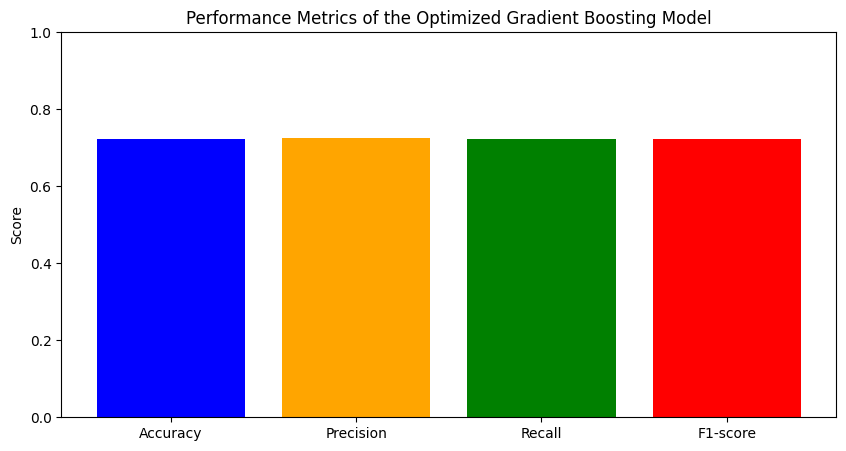

In [ ]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def objective(trial):
    # Define the search space for hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=50),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
    }

    # Initialize and train the model
    gbm = GradientBoostingClassifier(**params, random_state=42)
    gbm.fit(X_train, y_train)

    # Make predictions and evaluate the model
    y_pred = gbm.predict(X_test)

    # Calculate the evaluation metric (using accuracy here)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy  # Optuna maximizes accuracy

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Get the best parameters
best_params = study.best_params
print(f"Best Parameters: {best_params}")

# Train the best model
best_gbm = GradientBoostingClassifier(**best_params, random_state=42)
best_gbm.fit(X_train, y_train)

# Predictions
y_pred_best = best_gbm.predict(X_test)

# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='weighted')
recall = recall_score(y_test, y_pred_best, average='weighted')
f1 = f1_score(y_test, y_pred_best, average='weighted')

# Show results
best_model_results = pd.DataFrame(
    [["Further Optimized Gradient Boosting", accuracy, precision, recall, f1]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"]
)

print("\nFurther Optimized Gradient Boosting Performance:")
print(best_model_results)

# Visualize results
import matplotlib.pyplot as plt

# Bar plot for performance metrics
metrics = [accuracy, precision, recall, f1]
metric_names = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(10, 5))
plt.bar(metric_names, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Performance Metrics of the Optimized Gradient Boosting Model')
plt.show()


Top Features Contributing to Predictions:
                      Feature  Importance
4              family_history    0.241078
5              work_interfere    0.195802
0                         Age    0.097241
10               care_options    0.082986
2                     Country    0.056365
6                no_employees    0.037782
14                      leave    0.035999
17                  coworkers    0.035098
9                    benefits    0.033635
15  mental_health_consequence    0.027365


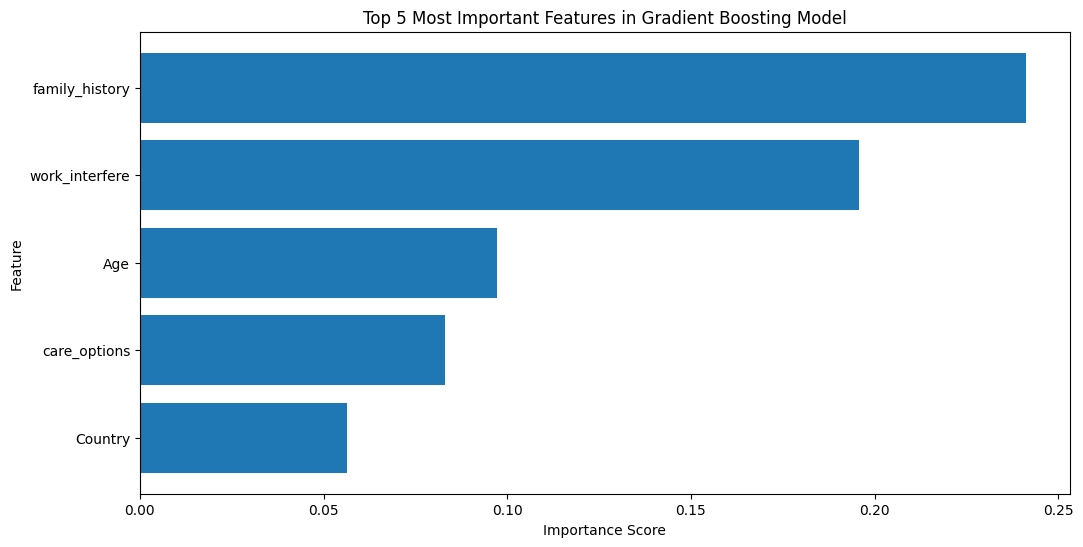

In [ ]:
import matplotlib.pyplot as plt
# Get feature importance from the trained model
feature_importance = best_gbm.feature_importances_

# Create a DataFrame to display feature importance values
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print the feature importance table
print("\nTop Features Contributing to Predictions:")
print(feature_importance_df.head(10))

# Plot the top 10 features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:5], feature_importance_df['Importance'][:5])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 5 Most Important Features in Gradient Boosting Model")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

**Test hypotheses**

**Analyze the relationship between remote work and mental health treatment**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Mental_tech.csv")  # Update the path if necessary

# Drop irrelevant columns
df_cleaned = df.drop(columns=['Timestamp', 'comments', 'state'], errors='ignore')

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Group data by remote work status and treatment
remote_work_treatment = df_cleaned.groupby(['remote_work', 'treatment']).size().unstack()

# Normalize by row to get percentage
remote_work_treatment_percentage = remote_work_treatment.div(remote_work_treatment.sum(axis=1), axis=0) * 100

# Print percentage data
print("\nRemote Work vs. Mental Health Treatment (Percentage):")
print(remote_work_treatment_percentage)

# Plot the data
plt.figure(figsize=(10, 6))
remote_work_treatment_percentage.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.xlabel("Remote Work Status")
plt.ylabel("Percentage (%)")
plt.title("Comparison of Mental Health Treatment Seeking Among Remote vs. Non-Remote Workers")
plt.legend(title="Treatment", labels=["No Treatment", "Sought Treatment"])
plt.xticks(rotation=0)
plt.show()
